In [1]:
%matplotlib inline

import os
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from Model import *

Using TensorFlow backend.


In [5]:
model = VGG16()

# Create the paths for inserting images
ROOT_DIR = os.getcwd()
input_dir = os.path.join(ROOT_DIR, "Datasets\Image_test\images")
dirs = os.listdir(input_dir)
n_images = len(dirs)


# Define a numpy.ndarray that stores the features that will be extracted by the VGG
features = np.empty([n_images,4096]) 
# Crete an array for the targets and then define the targets
target = np.empty(n_images)

# for example
target[:117] = 0
target[117:] = 1
# convert them into a list
targets = list(target)

# Shuffle them 
combined = list(zip(dirs, targets))
shuffle(combined)

dirs, targets = zip(*combined)

i = 0
for item in dirs:
        img_path = os.path.join(input_dir,item) 
        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            features[i] = model.predict(x)
            i+=1


(121, 50)


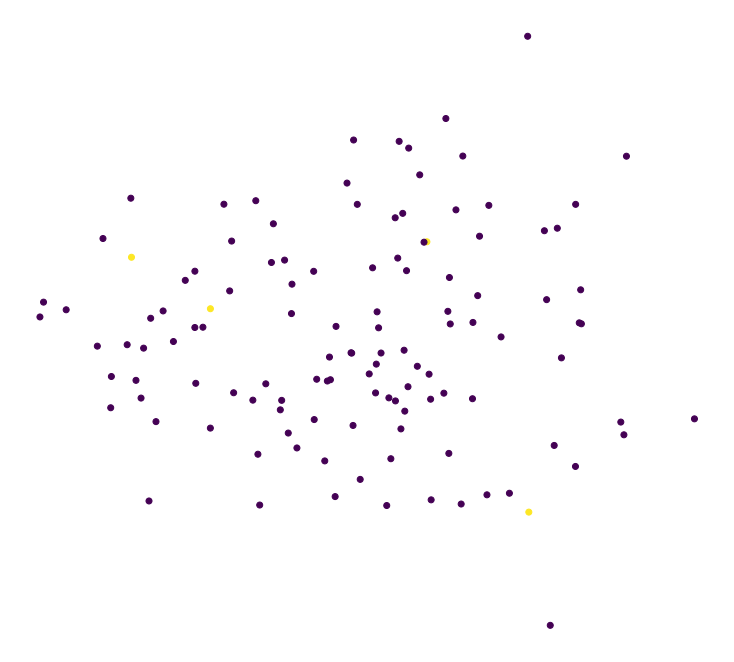

In [7]:
# Insert the extracted features to PCA, in order to reduce dimensions to 50
X_pca = PCA(n_components=50).fit_transform(features)
print(X_pca.shape)

# Plot the result with scatter
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=targets)

[t-SNE] Computing 120 nearest neighbors...
[t-SNE] Indexed 121 samples in 0.008s...
[t-SNE] Computed neighbors for 121 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 121 / 121
[t-SNE] Mean sigma: 60.484228
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 66.8376389, gradient norm = 0.4241057 (50 iterations in 0.057s)
[t-SNE] Iteration 100: error = 63.5516853, gradient norm = 0.5640415 (50 iterations in 0.046s)
[t-SNE] Iteration 150: error = 66.2754593, gradient norm = 0.4637468 (50 iterations in 0.045s)
[t-SNE] Iteration 200: error = 61.7646751, gradient norm = 0.5281006 (50 iterations in 0.070s)
[t-SNE] Iteration 250: error = 66.5893555, gradient norm = 0.4650701 (50 iterations in 0.046s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.589355
[t-SNE] Iteration 300: error = 1.2000945, gradient norm = 0.0057651 (50 iterations in 0.043s)
[t-SNE] Iteration 350: error = 1.0081695, gradient norm = 0.0032315

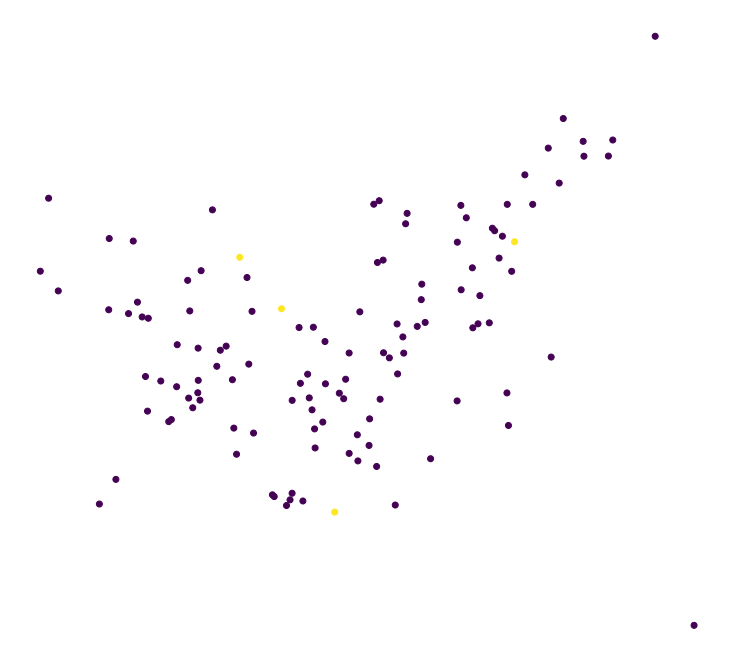

In [8]:
# Take the reduced features by PCA and insert them into t-sne
X_tsne= TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_pca)

# Plot the result with scatter
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_tsne[:, 0], X_pca[:, 1],c=targets)